In [1]:
import os
import cv2 as cv
import numpy as np
from ultralytics import YOLO


In [14]:
# Load YOLO model (update path if necessary)
model = YOLO('best_osmu-e.pt')


image_folder = 'Dataset/Real_World_images'
output_folder = 'Dataset/yolo_masks'

# Desired output image size (e.g., width=640, height=480)
output_size = (640, 480)

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        image_path = os.path.join(image_folder, filename)
        
        # Make predictions on the image
        results = model.predict(image_path)
        
        # Process each result
        for result in results:
            # Check if the result contains masks
            if hasattr(result, 'masks') and result.masks is not None:
                masks = result.masks
                mask_array = masks.data.cpu().numpy()  # Convert to NumPy array

                # Create a blank mask to accumulate all masks
                combined_mask = np.zeros((mask_array.shape[1], mask_array.shape[2]), dtype=np.uint8)

                # Loop through each mask and accumulate
                for i in range(mask_array.shape[0]):
                    mask = mask_array[i]
                    combined_mask[mask > 0] = 255  # Set mask pixels to white

                # Resize the combined mask to the desired size
                combined_mask_resized = cv.resize(combined_mask, output_size)

                # Save the resized combined mask as an imageA
                mask_filename = os.path.splitext(filename)[0] + '.png'
                mask_path = os.path.join(output_folder, mask_filename)
                cv.imwrite(mask_path, combined_mask_resized)  # Save the mask image

                print(f"Saved mask for {filename} at {mask_path}")
            else:
                print(f"No masks found for {filename}")



image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\Real_World_images\034ef1c.jpg: 448x640 51 Clouds, 1553.8ms
Speed: 31.2ms preprocess, 1553.8ms inference, 83.5ms postprocess per image at shape (1, 3, 448, 640)
Saved mask for 034ef1c.jpg at Dataset/yolo_masks\034ef1c.png

image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\Real_World_images\11f25d7.jpg: 448x640 35 Clouds, 1197.8ms
Speed: 4.0ms preprocess, 1197.8ms inference, 36.1ms postprocess per image at shape (1, 3, 448, 640)
Saved mask for 11f25d7.jpg at Dataset/yolo_masks\11f25d7.png

image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\Real_World_images\15b3f99.jpg: 448x640 74 Clouds, 1237.5ms
Speed: 4.0ms preprocess, 1237.5ms inference, 62.2ms postprocess per image at shape (1, 3, 448, 640)
Saved mask for 15b3f99.jpg at Dataset/yolo_masks\15b3f99.png

image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\Real_World_images\15b9d31.jpg: 448x640 55 Clouds, 1130.4ms
Speed: 3.0ms preprocess, 1130.4ms infere

In [15]:
source_folder = 'Dataset/Real_World_images'
destination_folder = 'Dataset/Real_World_images_mask'

output_size = (640, 480)
min_area = 0
# Create the output directory if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Process each image in the input directory
for filename in os.listdir(source_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Full path to the input image
        image_path = os.path.join(source_folder, filename)

        # Read the image
        image = cv.imread(image_path)

        # Convert to grayscale
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        # Apply Gaussian Blur to reduce noise
        blurred = cv.GaussianBlur(gray, (9, 9), 0)

        # Apply Otsu's thresholding
        ret, binary_mask = cv.threshold(
            blurred, 
            0,               
            255,              
            cv.THRESH_BINARY + cv.THRESH_OTSU
        )

        num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(binary_mask)

        # Create an empty image to store the filtered clusters
        filtered_image = np.zeros_like(binary_mask)

        # Loop through each connected component and filter based on area
        for i in range(1, num_labels):  # Skipping the background label (0)
            area = stats[i, cv.CC_STAT_AREA]  # Get the area of the connected component
            if area >= min_area:
                # If the area is greater than or equal to the threshold, keep the component
                filtered_image[labels == i] = 255

        # Create the output file path
        filtered_image = cv.resize(filtered_image, output_size)  
        output_path = os.path.join(destination_folder, filename)

        # Create the output file path with .png extension
        output_filename = os.path.splitext(filename)[0] + '.png'
        output_path = os.path.join(destination_folder, output_filename)

        # Save the binary mask as PNG to the output directory
        cv.imwrite(output_path, filtered_image)

034ef1c.png | Dice Coefficient: 0.7047 | IoU: 0.5441
11f25d7.png | Dice Coefficient: 0.8051 | IoU: 0.6738
15b3f99.png | Dice Coefficient: 0.7239 | IoU: 0.5672
15b9d31.png | Dice Coefficient: 0.7669 | IoU: 0.6219
21d93a3.png | Dice Coefficient: 0.7829 | IoU: 0.6432
39a6998.png | Dice Coefficient: 0.6391 | IoU: 0.4696
42dca86.png | Dice Coefficient: 0.7774 | IoU: 0.6359
518e821.png | Dice Coefficient: 0.7110 | IoU: 0.5515
609f727.png | Dice Coefficient: 0.7180 | IoU: 0.5601
6d91d1e.png | Dice Coefficient: 0.6303 | IoU: 0.4602
7e325e2.png | Dice Coefficient: 0.8292 | IoU: 0.7083
87dfdfc.png | Dice Coefficient: 0.6254 | IoU: 0.4550
8ba3f0f.png | Dice Coefficient: 0.5760 | IoU: 0.4045
afc07fc0.png | Dice Coefficient: 0.7872 | IoU: 0.6490
afc66038.png | Dice Coefficient: 0.6064 | IoU: 0.4351
afd43649.png | Dice Coefficient: 0.7433 | IoU: 0.5915
afd6c366.png | Dice Coefficient: 0.6801 | IoU: 0.5153
afda8a78.png | Dice Coefficient: 0.7020 | IoU: 0.5408
afdb8db0.png | Dice Coefficient: 0.6423 |

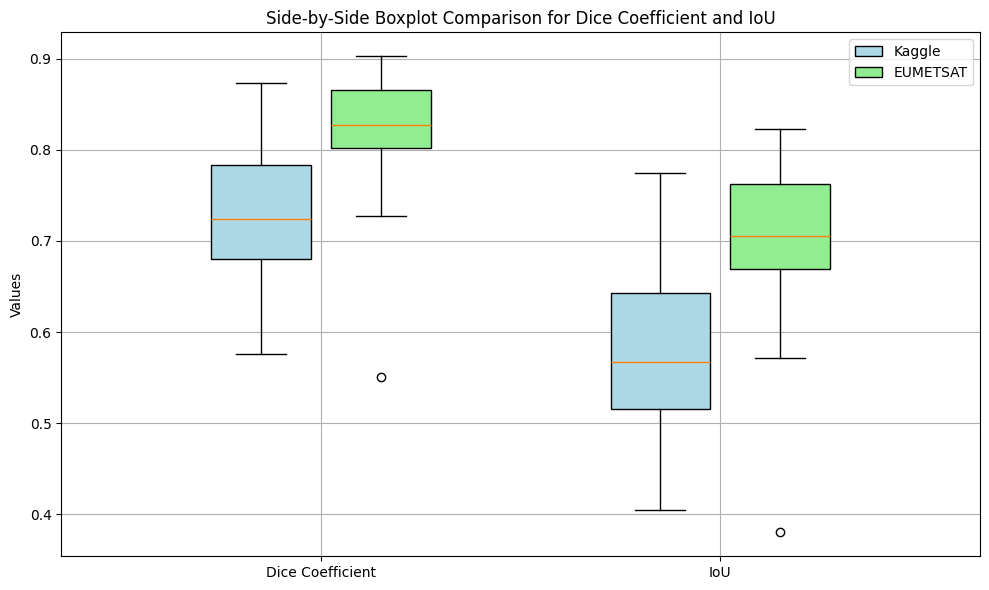

In [3]:
import matplotlib.pyplot as plt

# Define the folders
actual_mask_folder = 'Dataset/Real_World_images_mask'
predicted_mask_folder = 'Dataset/yolo_masks'
visualization_folder = 'Dataset/visualizations'

# Create visualization folder if it doesn't exist
os.makedirs(visualization_folder, exist_ok=True)

# Initialize variables to accumulate the total values
total_dice_coefficient = 0
total_iou = 0
image_count = 0  # To keep track of the number of processed images

# Lists to store Dice and IoU values for box and whisker plot
dice_list = []
iou_list = []

# Function to visualize and save the images
def visualize_bitwise_operations(filename, actual, predicted, intersection, union):
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.title('Actual Mask')
    plt.imshow(actual, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Predicted Mask')
    plt.imshow(predicted, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Intersection (AND)')
    plt.imshow(intersection, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Union (OR)')
    plt.imshow(union, cmap='gray')
    plt.axis('off')

    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(visualization_folder, f'visualization_{filename}')
    plt.savefig(save_path)
    plt.close()  # Close the figure to save memory

# Loop through all files in the actual mask folder
for filename in os.listdir(actual_mask_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        actual_mask_path = os.path.join(actual_mask_folder, filename)
        predicted_mask_path = os.path.join(predicted_mask_folder, filename)
        
        # Check if the predicted mask exists
        if os.path.exists(predicted_mask_path):
            # Read the actual and predicted mask images
            actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
            predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
            
            # Ensure masks are binary
            _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
            _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
            
            # Calculate intersection and union using bitwise operations
            intersection = cv.bitwise_and(actual_binary, predicted_binary)
            union = cv.bitwise_or(actual_binary, predicted_binary)
            
            # Calculate Dice coefficient
            actual_area = np.sum(actual_binary)
            predicted_area = np.sum(predicted_binary)
            if (actual_area + predicted_area) > 0:
                dice_coefficient = (2 * np.sum(intersection)) / (actual_area + predicted_area)
            else:
                dice_coefficient = 0.0
            
            # Calculate IoU
            union_area = np.sum(union)
            if union_area > 0:
                iou = np.sum(intersection) / union_area
            else:
                iou = 0.0
            
            # Add the dice coefficient and IoU to their respective lists
            dice_list.append(dice_coefficient)
            iou_list.append(iou)
            
            # Accumulate the values for averaging later
            total_dice_coefficient += dice_coefficient
            total_iou += iou
            image_count += 1  # Increment the image count
            
            # Print the results for each image
            print(f"{filename} | Dice Coefficient: {dice_coefficient:.4f} | IoU: {iou:.4f}")
            
            # Visualize and save the bitwise operation results
            visualize_bitwise_operations(filename, actual_binary, predicted_binary, intersection, union)
        else:
            print(f"Predicted mask for {filename} not found.")

# Calculate the averages if there were any valid images processed
if image_count > 0:
    avg_dice_coefficient = total_dice_coefficient / image_count
    avg_iou = total_iou / image_count
    
    # Print the average results
    print("\n=== AVERAGE RESULTS ===")
    print(f"Average Dice Coefficient: {avg_dice_coefficient:.4f}")
    print(f"Average IoU: {avg_iou:.4f}")
    
    # Split the first 30 values and the next 30 values for comparison
    first_25_dice = dice_list[:25]
    next_25_dice = dice_list[25:50]
    
    first_25_iou = iou_list[:25]
    next_25_iou = iou_list[25:50]

    # Create side-by-side box and whisker plots for Dice and IoU
    data_to_plot = [first_25_dice, next_25_dice, first_25_iou, next_25_iou]
    labels = ['Kaggle Dice Coefficent', 'EUMETSAT Dice Coefficient', 'Kaggle Iou', 'EUMETSAT IoU']

    # Define positions for the boxes
    positions = [1, 1.3, 2, 2.3]  # This places the dice boxes closer and the iou boxes closer

    # Colors for Kaggle (left) and EUMETSAT (right)
    colors = ['lightblue', 'lightgreen']

    plt.figure(figsize=(10, 6))

    # Plot each set of boxplots with specific colors
    boxprops = dict(patch_artist=True)
    bplot1 = plt.boxplot([first_25_dice], patch_artist=True, widths=0.25, positions=[1], boxprops=dict(facecolor=colors[0]))
    bplot2 = plt.boxplot([next_25_dice], patch_artist=True, widths=0.25, positions=[1.3], boxprops=dict(facecolor=colors[1]))
    bplot3 = plt.boxplot([first_25_iou], patch_artist=True, widths=0.25, positions=[2], boxprops=dict(facecolor=colors[0] ))
    bplot4 = plt.boxplot([next_25_iou], patch_artist=True, widths=0.25, positions=[2.3], boxprops=dict(facecolor=colors[1]))

    # Set custom x-ticks for clearer labeling
    plt.xticks([1.15, 2.15], ['Dice Coefficient', 'IoU'])

    # Add a title and labels
    plt.title("Side-by-Side Boxplot Comparison for Dice Coefficient and IoU")
    plt.ylabel("Values")
    
    # Add a legend for Kaggle and EUMETSAT
    plt.legend([bplot1["boxes"][0], bplot2["boxes"][0]], ['Kaggle', 'EUMETSAT'], loc='upper right')

    plt.grid(True)
    plt.tight_layout()
    
    # Save the boxplot
    plt.savefig(os.path.join(visualization_folder, 'dice_iou_boxplot_comparison.png'))
    plt.show()

else:
    print("No images were processed.")
